In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("suicides.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df_null = df[df.isnull().any(axis=1)]
df_null

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27755,Uzbekistan,2009,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
27756,Uzbekistan,2009,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers
27757,Uzbekistan,2009,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent
27758,Uzbekistan,2009,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z


In [6]:
df = df.drop(['HDI for year'], axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [7]:
# Check for null/na values in df
df.isnull().values.any()

False

In [8]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [9]:
# import Ordinal Encoder for categorical features
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
onehot_enc = OneHotEncoder(sparse=False)
ordinal_enc = OrdinalEncoder()
label_enc = LabelEncoder()

In [11]:
df['Country'] = label_enc.fit_transform(df['country'])
df['Generation'] = label_enc.fit_transform(df['generation'])
df[['Year','Sex','Age','Country-year']] = ordinal_enc.fit_transform(df[['year','sex','age','country-year']])

In [12]:
col = ['Country','Year','Sex','Age','suicides_no','population','suicides/100k pop','Country-year',' gdp_for_year ($)','gdp_per_capita ($)', 'Generation']
df = df.reindex(col,axis=1)

In [13]:
df

,Country,Year,Sex,Age,suicides_no,population,suicides/100k pop,Country-year,gdp_for_year ($),gdp_per_capita ($),Generation
0,0,2.0,1.0,0.0,21,312900,6.71,0.0,NaN,796,2
1,0,2.0,1.0,2.0,16,308000,5.19,0.0,NaN,796,5
2,0,2.0,0.0,0.0,14,289700,4.83,0.0,NaN,796,2
3,0,2.0,1.0,5.0,1,21800,4.59,0.0,NaN,796,1
4,0,2.0,1.0,1.0,9,274300,3.28,0.0,NaN,796,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29.0,0.0,2.0,107,3620833,2.96,2320.0,NaN,2309,2
27816,100,29.0,0.0,5.0,9,348465,2.58,2320.0,NaN,2309,5
27817,100,29.0,1.0,3.0,60,2762158,2.17,2320.0,NaN,2309,3
27818,100,29.0,0.0,3.0,44,2631600,1.67,2320.0,NaN,2309,3


In [14]:
df = df.drop(' gdp_for_year ($)',axis=1)

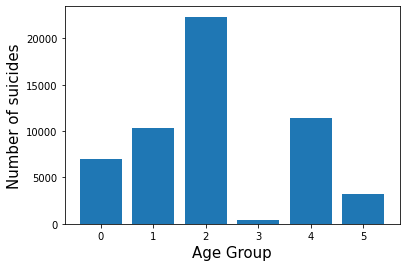

In [15]:
plt.bar(df['Age'],df['suicides_no'])
plt.xlabel('Age Group',size=15)
plt.ylabel('Number of suicides', size=15)

plt.show()

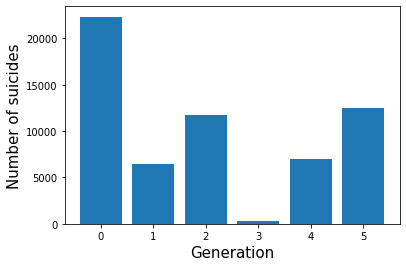

In [16]:
plt.bar(df['Generation'],df['suicides_no'])
plt.xlabel('Generation',size=15)
plt.ylabel('Number of suicides', size=15)

plt.show()

In [17]:
df.to_csv('preprocessed_suicides.csv', index=False)